In [ ]:
# 내 구글 드라이브에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
416/416 [==============================] - 1s 2ms/step - loss: 654517.5000
Epoch 2/2000
416/416 [==============================] - 1s 1ms/step - loss: 8012.8330
Epoch 3/2000
416/416 [==============================] - 1s 1ms/step - loss: 7462.8901
Epoch 4/2000
416/416 [==============================] - 1s 1ms/step - loss: 7094.8711
Epoch 5/2000
416/416 [==============================] - 1s 1ms/step - loss: 6837.6143
Epoch 6/2000
416/416 [==============================] - 1s 2ms/step - loss: 6680.0107
Epoch 7/2000
416/416 [==============================] - 1s 1ms/step - loss: 6566.6606
Epoch 8/2000
416/416 [============================

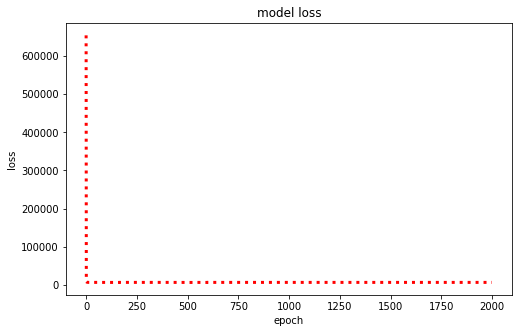




                                                  **** Records Prediction ****


    Gender        Age       Pace                    Real record                  ML Prediction              Variation(Second)


      Male         24        297                 02:09:37(7777)             02:09:39(7779.618)                  -2.6181640625



In [ ]:
# 초를 시간형식으로 변환해 주는 함수
def seconds_to_hhmmss(seconds):
    hours = seconds // (60*60)
    seconds %= (60*60)
    minutes = seconds // 60
    seconds %= 60
    return "%02i:%02i:%02i" % (hours, minutes, seconds)

# normalization
def normalization(record):
    r0 = record[0]
    r1 = record[1] / 10
    r2 = record[2] / 100
    return [r0, r1, r2]

# 만들어진 모델에 대해 train dataset의 loss 를 그래프로 표현
def display_graph():
    plt.figure(figsize=(8,5))

    plt.plot(history.history['loss'], 'r:', linewidth=3)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

    plt.show()
    
# pandas 를 불러옵니다.
import pandas as pd

# marathon_2015_2017.csv 파일을 읽어와 marathon_2015_2017 DataFrame 을 생성합니다.
marathon_2015_2017 = pd.read_csv("gdrive/My Drive/MLDL/marathon_data/marathon_2015_2017.csv")
# 'M/F' column은 'M'->1, 'F'->0 으로 변환하여 저장합니다.
marathon_2015_2017['M/F'] = marathon_2015_2017['M/F'].map({'M': 1, 'F': 0})

# 2015~2016년도 데이터만 가져와 marathon_2015_2016 DataFrame을 생성합니다.
marathon_2015_2016 = marathon_2015_2017[marathon_2015_2017['Year'] != 2017]
# 2017년도 데이터만 가져와 marathon_2017 DataFrame 생성합니다.
marathon_2017 = marathon_2015_2017[marathon_2015_2017['Year'] == 2017]

# marathon_2015_2016에서 'M/F',  'Age',  'Pace',  '10K', '20K',  '30K',  'Official Time' column만 가져옵니다.
df_2015_2016 = pd.DataFrame(marathon_2015_2016,columns=['M/F', 'Age', 'Pace', '10K', '20K', '30K', 'Official Time'])
# marathon_2017에서 'M/F',  'Age',  'Pace',  '10K', '20K',  '30K',  'Official Time' column만 가져옵니다.
df_2017 = pd.DataFrame(marathon_2017,columns=['M/F', 'Age', 'Pace', '10K', '20K', '30K', 'Official Time'])

# df_2015_2016 DataFrame을 리스트로 변환합니다.
record_2015_2016 = df_2015_2016.values.tolist()
# df_2017 DataFrame을 리스트로 변환합니다.
record_2017 = df_2017.values.tolist()

# gender 리스트 정의
gender_list = ['Female', 'Male']

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

t_t = 2000   # training 횟수(epoch)
t_r = 0.01   # learning rate
t_s = 1      # 등수

# train dataset 정의
x_train = [normalization(r[0:3]) for r in record_2015_2016]
y_train = [r[-1] for r in record_2015_2016]

# test dataset 정의
x_test = [normalization(r[0:3]) for r in record_2017]
y_test = [r[-1] for r in record_2017]

# 모델 구성하기
model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(3,)))  # input은 3개, output 은 1개
# 모델 학습과정 설정하기 
sgd = tf.keras.optimizers.SGD(lr=t_r)
model.compile(loss='mse', optimizer=sgd)

# 모델 구성 확인하기
model.summary()

# 모델 학습시키기
history = model.fit(np.array(x_train), np.array(y_train), epochs=t_t, batch_size=128)

# 그래프 출력
display_graph()

# 예측하기
runner = x_test[t_s-1]
time = model.predict(np.array([runner]))

# 예측 결과 출력
real_time = seconds_to_hhmmss(y_test[t_s-1]) + '(' + str(y_test[t_s-1]) + ')'
ml_time = seconds_to_hhmmss(time[0][0]) + '(' + str(time[0][0]) + ')'
variation = y_test[t_s-1] - time[0][0]

print('\n\n')
print("%80s" % ('**** Records Prediction ****\n\n'))
print("%10s %10s %10s %30s %30s %30s" % ('Gender', 'Age', 'Pace', 'Real record', 'ML Prediction', 'Variation(Second)')+'\n\n')
print("%10s %10s %10s %30s %30s %30s" % (gender_list[record_2017[t_s-1][0]], str(record_2017[t_s-1][1]), str(record_2017[t_s-1][2]), real_time, ml_time, variation)+'\n')

In [ ]:
t_s = 30  # 등수

# test dataset 으로 예측
runner = x_test[t_s-1]
time = model.predict(np.array([runner]))

# 예측 결과 출력
real_time = seconds_to_hhmmss(y_test[t_s-1]) + '(' + str(y_test[t_s-1]) + ')'
ml_time = seconds_to_hhmmss(time[0][0]) + '(' + str(time[0][0]) + ')'
variation = y_test[t_s-1] - time[0][0]

print('\n\n')
print("%80s" % ('**** Records Prediction ****\n\n'))
print("%10s %10s %10s %30s %30s %30s" % ('Gender', 'Age', 'Pace', 'Real record', 'ML Prediction', 'Variation(Second)')+'\n\n')
print("%10s %10s %10s %30s %30s %30s" % (gender_list[record_2017[t_s-1][0]], str(record_2017[t_s-1][1]), str(record_2017[t_s-1][2]), real_time, ml_time, variation)+'\n')




                                                  **** Records Prediction ****


    Gender        Age       Pace                    Real record                  ML Prediction              Variation(Second)


      Male         39        331                 02:24:27(8667)             02:24:31(8671.138)                  -4.1376953125

